# MODELO SIR: Ajuste de datos para México

José Domingo Cajina Ramírez \\
Proyecto Final: Investigación de Operaciones


---

Este es uno de los modelos epidemiológicos mas sencillos capaz de describir con pocas suposiciones un brote epidémico.

 El nombre del modelo viene de las iniciales S (Susceptible), I (Infectados) y R ( Recuperados), donde S son todas las personas que podrían contraer la enfermedad, I son la cantidad de infectados iniciales en el sistema y R son las personas que han adquirido inmunidad, ya se por superar la enfermedad o por haber fallecido.



---

Se desea realizar un ajuste del modelo a la evolución de la pandemia en México, por lo que descargamos la base de datos de un sitio oficial y la incluimos en el repositorio de este notebook, comenzamos prepocesando los datos para dejarlos listos para el análisis



In [0]:
#importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
plt.style.use('fivethirtyeight')

In [0]:
#Descargamos Data del repositorio

#Datos de casos confirmados
!wget -cq https://raw.githubusercontent.com/Physicworld/ProyectoIO/master/Data_Base/Casos_Diarios_Estado_Nacional_Confirmados.csv

#Datos de defunciones
!wget -cq https://raw.githubusercontent.com/Physicworld/ProyectoIO/master/Data_Base/Casos_Diarios_Estado_Nacional_Defunciones.csv

#Datos de casos negativos
!wget -cq https://raw.githubusercontent.com/Physicworld/ProyectoIO/master/Data_Base/Casos_Diarios_Estado_Nacional_Negativos.csv

#Datos de casos sospechosos
!wget -cq https://raw.githubusercontent.com/Physicworld/ProyectoIO/master/Data_Base/Casos_Diarios_Estado_Nacional_Sospechosos.csv

In [0]:
#Creamos un dataframe de los datos

df = pd.read_csv("Casos_Diarios_Estado_Nacional_Confirmados.csv", encoding='Latin-1')
data_casos_confirmados = pd.DataFrame(df)

df = pd.read_csv("Casos_Diarios_Estado_Nacional_Defunciones.csv", encoding='Latin-1')
data_casos_defunciones = pd.DataFrame(df)

df = pd.read_csv("Casos_Diarios_Estado_Nacional_Negativos.csv", encoding='Latin-1')
data_casos_negativos = pd.DataFrame(df)

df = pd.read_csv("Casos_Diarios_Estado_Nacional_Sospechosos.csv", encoding='Latin-1')
data_casos_sospechosos = pd.DataFrame(df)


# Damos pantalla a cada DataFrame

In [5]:
data_casos_confirmados.head(3)

,cve_ent,poblacion,nombre,07-01-2020,08-01-2020,09-01-2020,10-01-2020,11-01-2020,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,27-01-2020,28-01-2020,29-01-2020,30-01-2020,31-01-2020,01-02-2020,02-02-2020,03-02-2020,04-02-2020,05-02-2020,06-02-2020,07-02-2020,08-02-2020,09-02-2020,10-02-2020,11-02-2020,12-02-2020,...,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020
0,0,127792286,Nacional,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,275,315,297,331,214,217,526,435,505,404,476,395,417,801,810,841,854,1000,688,636,1287,1254,1180,1259,1457,907,853,1603,1575,1534,1435,976,907,840,1756,1282,1144,716,356,44
1,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,3,4,1,1,0,2,1,2,7,1,11,6,17,13,3,16,13,13,20,11,1,7,16,29,17,22,4,2,2,30,1,0,0,0,0
2,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,64,29,39,24,20,68,38,59,59,46,33,40,81,101,96,83,88,40,35,97,84,74,104,87,44,55,94,87,100,67,57,32,46,67,44,42,19,3,2


In [6]:
data_casos_defunciones.head(3)

,cve_ent,poblacion,nombre,17-03-2020,18-03-2020,19-03-2020,20-03-2020,21-03-2020,22-03-2020,23-03-2020,24-03-2020,25-03-2020,26-03-2020,27-03-2020,28-03-2020,29-03-2020,30-03-2020,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020
0,0,127792286,Nacional,0,2,0,1,0,1,1,2,2,8,6,13,8,11,21,18,25,31,29,26,53,54,45,48,57,61,61,66,76,81,63,83,86,104,112,112,119,116,138,140,138,129,116,143,139,146,136,111,130,131,109,79,55,20,3
1,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,2,2,0,0,0
2,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,5,2,5,1,10,5,6,5,6,9,11,7,10,14,10,15,13,16,10,11,14,14,21,12,12,25,13,20,12,14,14,5,11,14,12,10,13,1,0


In [7]:
data_casos_negativos.head(3)

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,07-01-2020,08-01-2020,09-01-2020,10-01-2020,11-01-2020,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,27-01-2020,28-01-2020,29-01-2020,30-01-2020,31-01-2020,01-02-2020,02-02-2020,03-02-2020,04-02-2020,05-02-2020,...,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020
0,0,127792286,Nacional,0,5,16,18,6,14,28,27,15,45,39,5,20,36,51,59,43,42,16,21,65,52,56,46,46,15,33,43,50,30,39,30,8,12,13,51,45,...,1214,1252,1382,1388,840,585,1439,1524,1644,1226,1423,952,760,1941,2013,1865,1755,1948,870,791,2156,1950,1878,2079,2337,1163,911,2425,2524,2844,3191,1405,1134,1171,2716,2115,1824,1271,578,87
1,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,...,28,40,43,39,31,12,40,34,31,2,16,23,13,46,43,61,34,22,17,28,84,62,45,90,89,6,23,83,87,113,126,15,17,138,49,23,6,2,1,0
2,2,3634868,BAJA CALIFORNIA,0,0,0,2,1,1,3,1,1,3,3,0,0,1,1,7,0,2,0,1,5,3,2,1,2,0,0,3,0,1,1,2,2,0,2,0,4,...,41,39,34,28,15,8,32,31,24,26,35,14,11,33,42,39,42,44,13,12,48,51,41,35,36,19,11,45,44,35,59,16,10,16,30,14,27,9,1,0


In [8]:
data_casos_sospechosos.head(3)

,cve_ent,poblacion,nombre,23-03-2020,24-03-2020,25-03-2020,26-03-2020,27-03-2020,28-03-2020,29-03-2020,30-03-2020,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020
0,0,127792286,Nacional,0,1,2,2,3,3,1,5,8,12,9,13,4,2,2,0,5,3,4,4,0,1,14,24,17,8,11,14,23,21,27,58,46,44,57,103,116,147,235,472,681,705,1430,1455,2724,3686,4735,2402,640
1,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,58,65,81,152,44,14,1
2,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,1,3,2,6,2,3,0,2,9,9,10,9,15,51,44,44,80,96,95,116,140,59,18


Nuestro objeto de estudio es el pais entero y no particularmente cada estado, podemos ver que cada grupo de datos nos da los datos nacionales en cada fecha, por lo cual nos quedaremos únicamente con la primera fila de cada dataframe.


In [9]:
df = data_casos_confirmados.drop(range(1,len(data_casos_confirmados)), axis=0)
data_casos_confirmados = df
data_casos_confirmados

,cve_ent,poblacion,nombre,07-01-2020,08-01-2020,09-01-2020,10-01-2020,11-01-2020,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,27-01-2020,28-01-2020,29-01-2020,30-01-2020,31-01-2020,01-02-2020,02-02-2020,03-02-2020,04-02-2020,05-02-2020,06-02-2020,07-02-2020,08-02-2020,09-02-2020,10-02-2020,11-02-2020,12-02-2020,...,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020
0,0,127792286,Nacional,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,275,315,297,331,214,217,526,435,505,404,476,395,417,801,810,841,854,1000,688,636,1287,1254,1180,1259,1457,907,853,1603,1575,1534,1435,976,907,840,1756,1282,1144,716,356,44


In [10]:
df = data_casos_defunciones.drop(range(1,len(data_casos_defunciones)), axis=0)
data_casos_defunciones = df
data_casos_defunciones

,cve_ent,poblacion,nombre,17-03-2020,18-03-2020,19-03-2020,20-03-2020,21-03-2020,22-03-2020,23-03-2020,24-03-2020,25-03-2020,26-03-2020,27-03-2020,28-03-2020,29-03-2020,30-03-2020,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020
0,0,127792286,Nacional,0,2,0,1,0,1,1,2,2,8,6,13,8,11,21,18,25,31,29,26,53,54,45,48,57,61,61,66,76,81,63,83,86,104,112,112,119,116,138,140,138,129,116,143,139,146,136,111,130,131,109,79,55,20,3


In [11]:
df = data_casos_negativos.drop(range(1,len(data_casos_negativos)), axis=0)
data_casos_negativos = df
data_casos_negativos

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,07-01-2020,08-01-2020,09-01-2020,10-01-2020,11-01-2020,12-01-2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,19-01-2020,20-01-2020,21-01-2020,22-01-2020,23-01-2020,24-01-2020,25-01-2020,26-01-2020,27-01-2020,28-01-2020,29-01-2020,30-01-2020,31-01-2020,01-02-2020,02-02-2020,03-02-2020,04-02-2020,05-02-2020,...,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020
0,0,127792286,Nacional,0,5,16,18,6,14,28,27,15,45,39,5,20,36,51,59,43,42,16,21,65,52,56,46,46,15,33,43,50,30,39,30,8,12,13,51,45,...,1214,1252,1382,1388,840,585,1439,1524,1644,1226,1423,952,760,1941,2013,1865,1755,1948,870,791,2156,1950,1878,2079,2337,1163,911,2425,2524,2844,3191,1405,1134,1171,2716,2115,1824,1271,578,87


In [12]:
df = data_casos_sospechosos.drop(range(1,len(data_casos_sospechosos)), axis=0)
data_casos_sospechosos = df
data_casos_sospechosos

,cve_ent,poblacion,nombre,23-03-2020,24-03-2020,25-03-2020,26-03-2020,27-03-2020,28-03-2020,29-03-2020,30-03-2020,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020
0,0,127792286,Nacional,0,1,2,2,3,3,1,5,8,12,9,13,4,2,2,0,5,3,4,4,0,1,14,24,17,8,11,14,23,21,27,58,46,44,57,103,116,147,235,472,681,705,1430,1455,2724,3686,4735,2402,640


Un dato en comun de cada data frame es la poblacion nacional podemos ver que es de 127792286 	habitantes.

La intencion es crear una sola tabla de datos para toda la estadísitica para su fácil manejo, por que lo que ponemos de index las fechas, transponemos cada dataframe y los unimos.

In [0]:
casos_mexico = pd.concat([data_casos_confirmados,data_casos_negativos, data_casos_sospechosos, data_casos_defunciones], axis=0)
casos_mexico = casos_mexico.drop(['cve_ent', 'poblacion'], axis=1)
casos_mexico = casos_mexico.fillna(0)

In [0]:
casos_mexico['nombre'].iloc[0] = 'casos_confirmados'
casos_mexico['nombre'].iloc[1] = 'casos_negativos'
casos_mexico['nombre'].iloc[2] = 'casos_sospechosos'
casos_mexico['nombre'].iloc[3] = 'casos_defunciones'
casos_mexico = casos_mexico.rename(columns={'nombre':'Fecha'})
casos_mexico = casos_mexico.reset_index().transpose().reset_index().drop(0, axis=0)
casos_mexico.columns = ['Fecha', 'casos_confirmados', 'casos_negativos','casos_sospechosos', 'casos_defunciones']
casos_mexico = casos_mexico.drop(1, axis=0)
casos_mexico.iloc[:,0] = pd.to_datetime( casos_mexico.iloc[:, 0], format = '%d-%m-%Y')
casos_mexico = casos_mexico.set_index( pd.DatetimeIndex(casos_mexico['Fecha']))
casos_mexico = casos_mexico.sort_index()

In [226]:
casos_mexico.tail(3)

,Fecha,casos_confirmados,casos_negativos,casos_sospechosos,casos_defunciones
Fecha,,,,,
2020-05-08,2020-05-08,356,578,4735,55
2020-05-09,2020-05-09,44,87,2402,20
2020-05-10,2020-05-10,0,0,640,3


# Ahora vamos a proceder a visualizar los datos


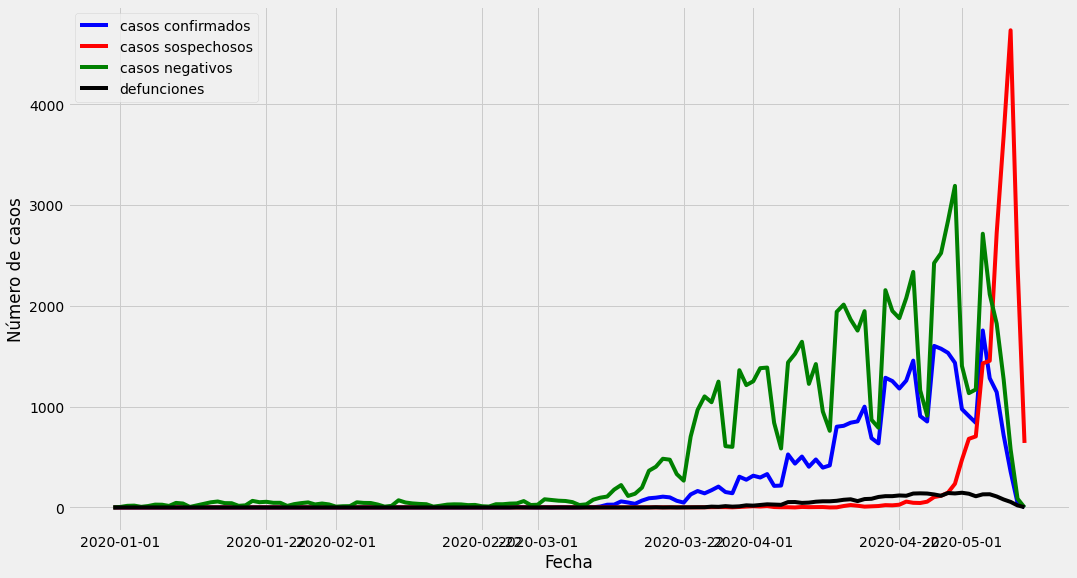

In [230]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(casos_mexico['casos_confirmados'], label='casos confirmados', color='blue')
ax.plot(casos_mexico['casos_sospechosos'], label='casos sospechosos', color='red')
ax.plot(casos_mexico['casos_negativos'], label='casos negativos', color='green')
ax.plot(casos_mexico['casos_defunciones'], label='defunciones', color='black')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de casos')
plt.legend()
plt.savefig('COVID-19')
plt.show()